In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from image_extractor import preprocess_hsv

ori =  173.74172973632812


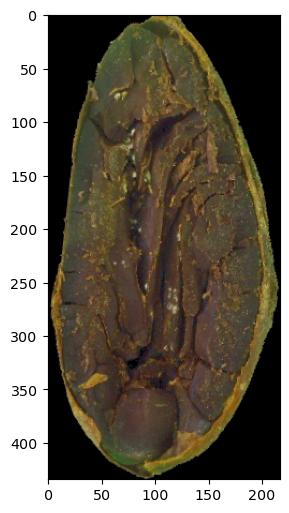

In [109]:
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (100).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (35).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (10).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (99).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_White/image (99).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_White/image (45).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Slaty/image (56).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Slaty/image (56).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Moldered/image (68).JPG'

plt.rcParams['figure.dpi'] = 102.46
plt.rcParams["figure.figsize"] = (6,6)

image = cv2.imread(image_dir)
image_hsv , cnt= preprocess_hsv(image)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(image_rgb)
plt.show()

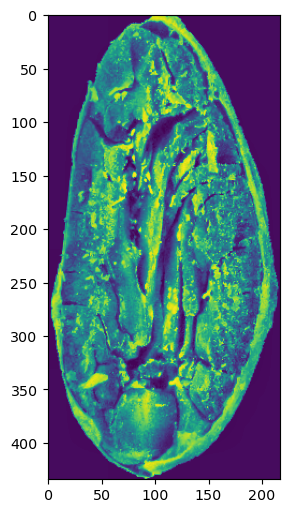

In [110]:
h,s,v = cv2.split(image_hsv)
clahe_op = cv2.createCLAHE(6, (8,8))
clahe_v = clahe_op.apply(v)
plt.rcParams["figure.figsize"] = (6,6)

plt.imshow(clahe_v)

[ 2.  4.  6.  8. 10. 12.]


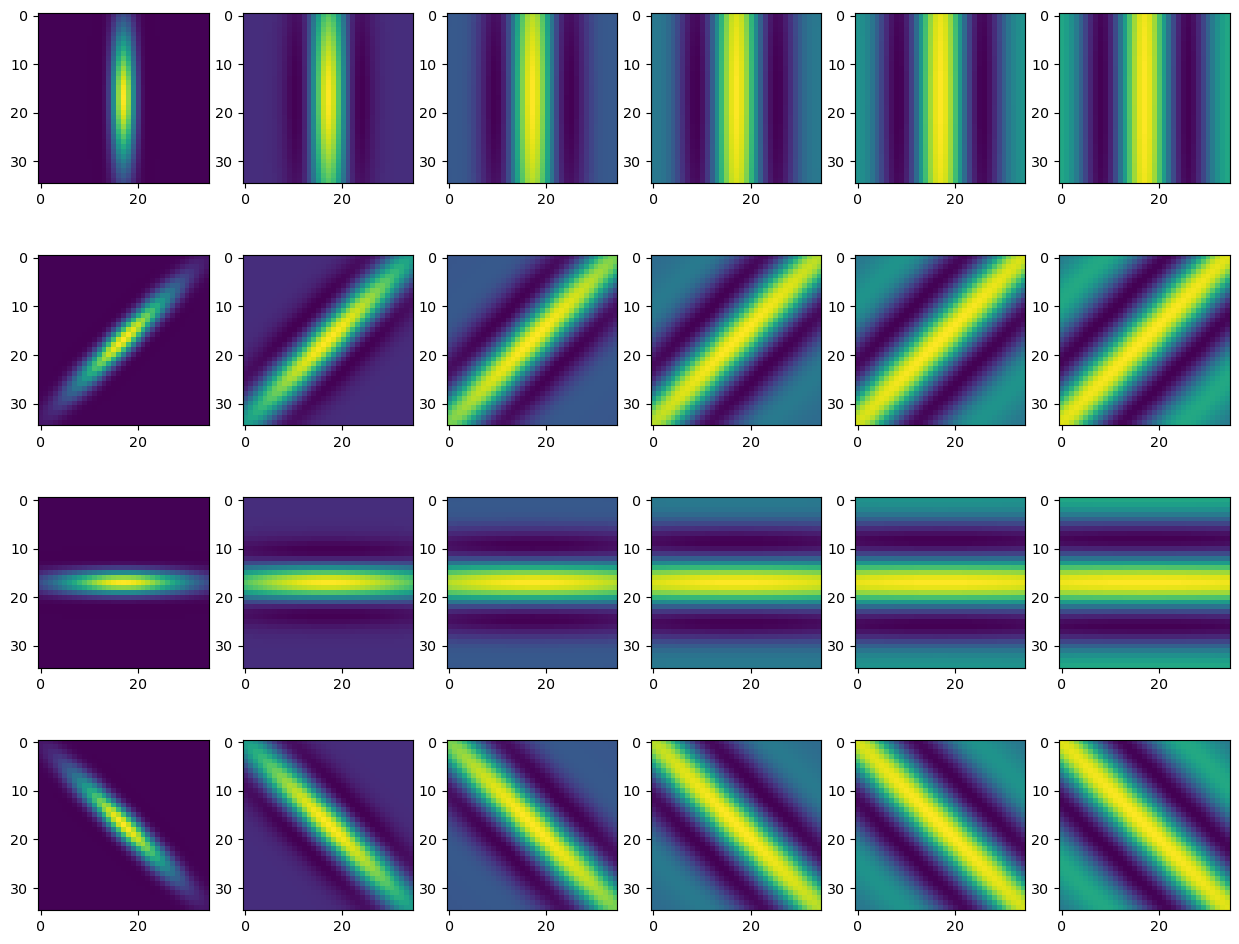

In [111]:
plt.rcParams["figure.figsize"] = (15,12)
pi = np.pi
theta = [0, pi/4, pi/2, 3*pi/4]
psi = np.linspace(2,12,6)
print(psi)
kernel = []
for i in range(len(theta)):
    for j in range(len(psi)):
        plt.subplot(len(theta), len(psi),i*len(psi)+j+1)
        kernel.append(cv2.getGaborKernel((35,35), sigma=psi[j], theta=theta[i], lambd=6*pi, gamma=0.2, psi=0))
        plt.imshow(kernel[len(kernel)-1])

In [112]:
# print(len(kernel))

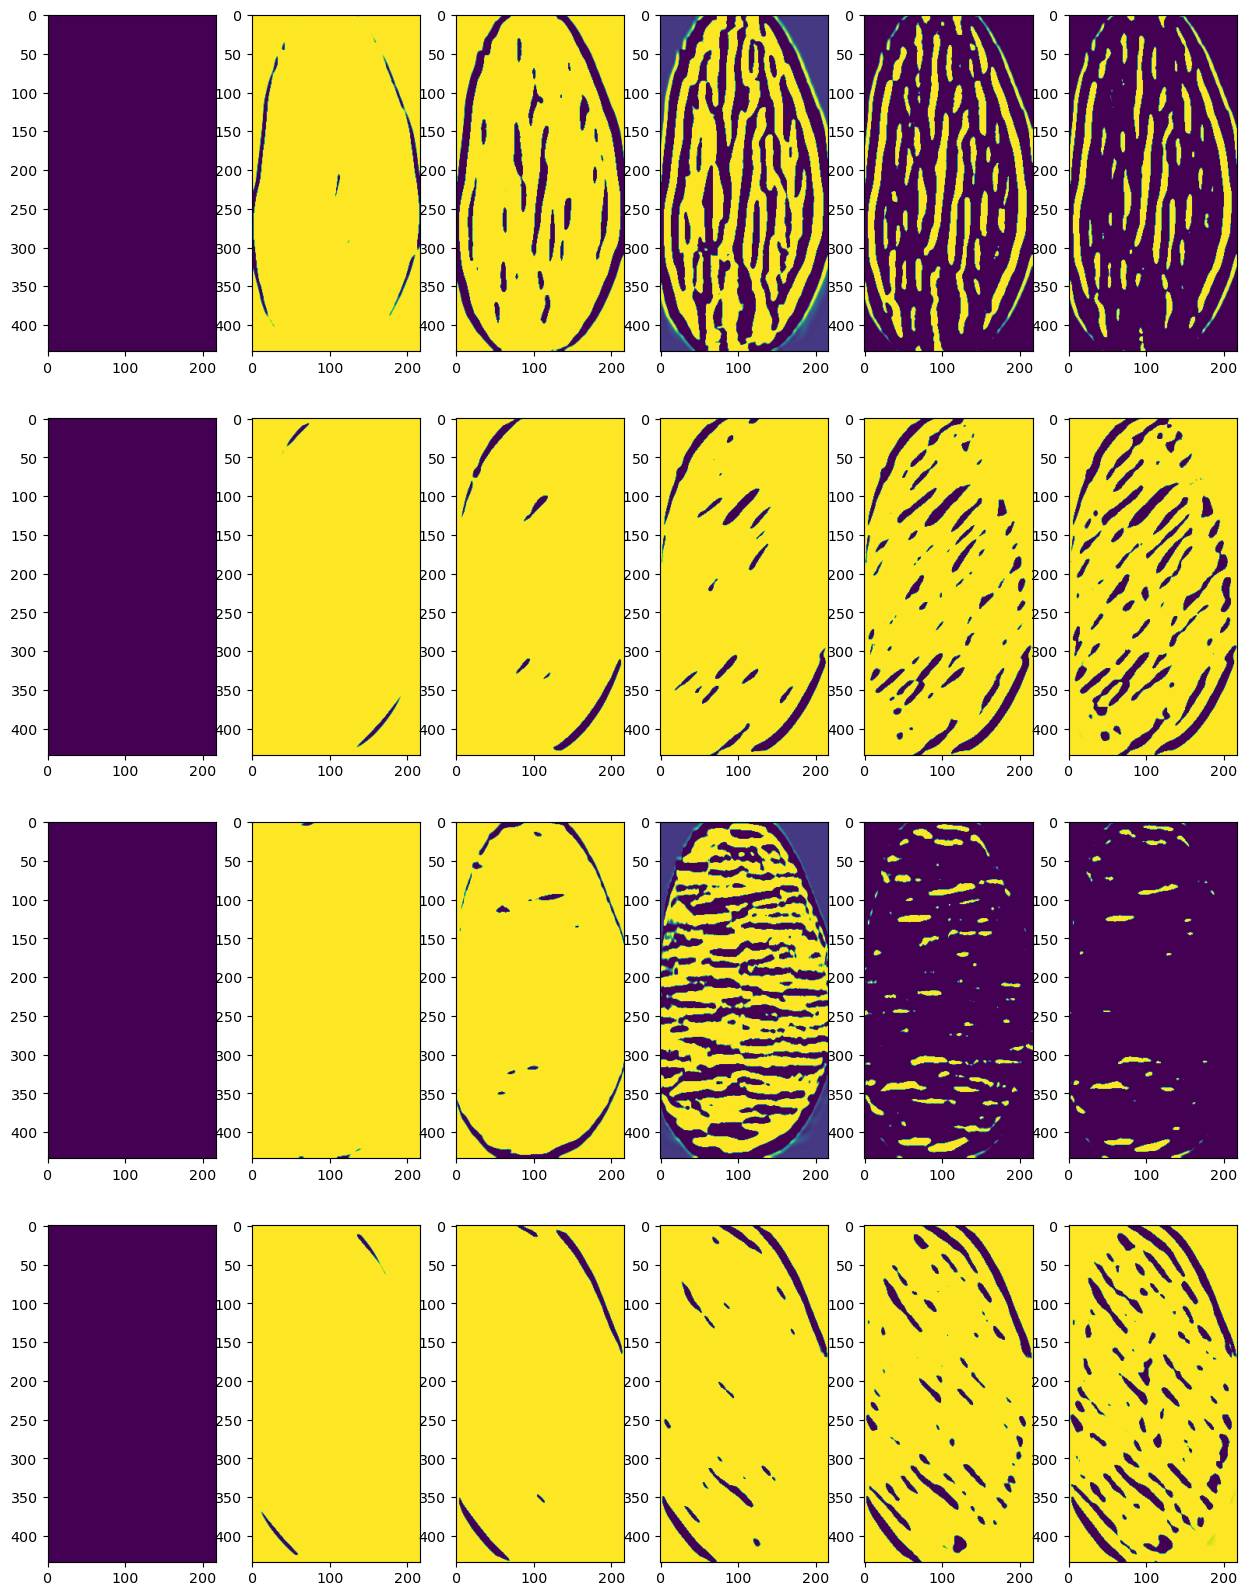

In [113]:
plt.rcParams["figure.figsize"] = (15,20)

gabor = []
for i in range(len(theta)):
    for j in range(len(psi)):
        # print(i,j)
        plt.subplot(len(theta), len(psi),i*len(psi)+j+1)
        im = cv2.filter2D(clahe_v, cv2.CV_8UC3, kernel[i*len(psi)+j])
        plt.imshow(im)
        gabor.append(im)

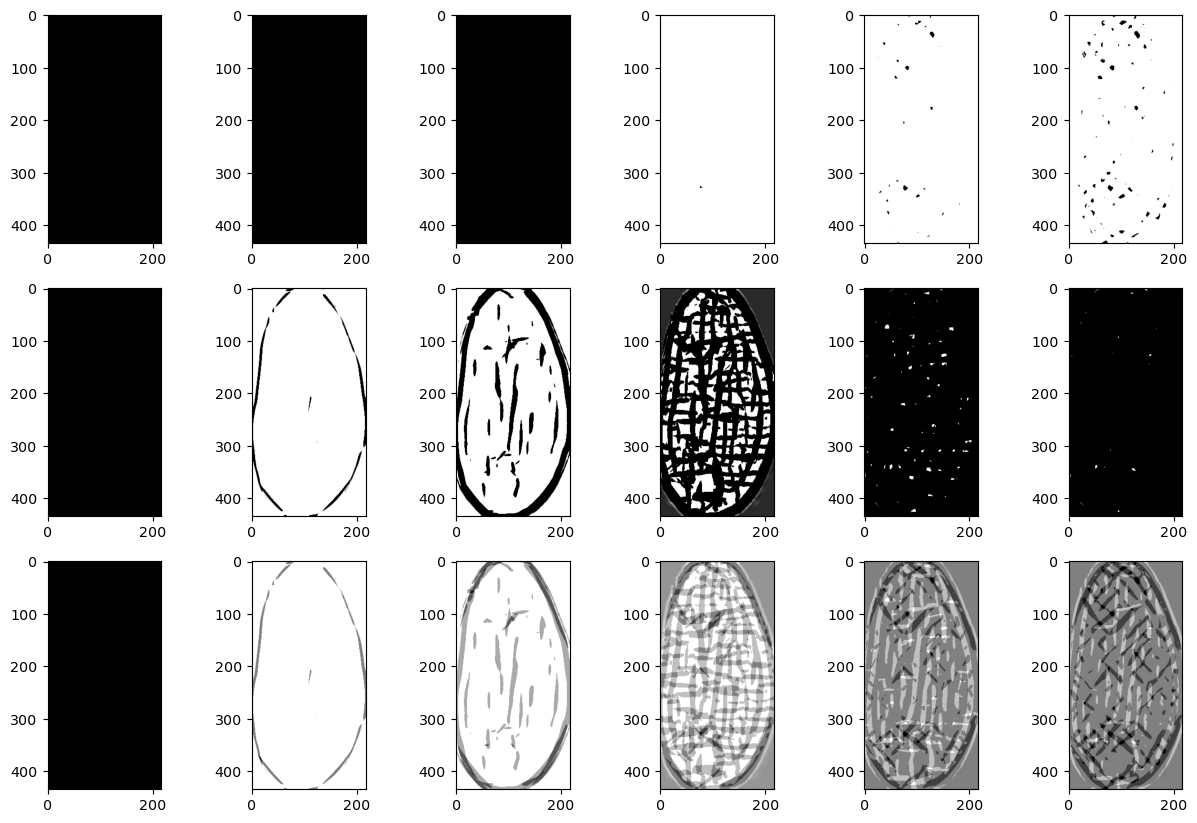

In [114]:
plt.rcParams["figure.figsize"] = (15,10)
for k in range(6):
    add = [gabor[k], gabor[k+6], gabor[k+12], gabor[k+18]]
    minpooled = np.min(add, axis=0)
    maxpooled = np.max(add, axis=0)
    add = np.sum(add, axis=0)
    plt.subplot(3,6,k+1)
    plt.imshow(maxpooled, cmap='gray')
    plt.subplot(3,6,6+k+1)
    plt.imshow(minpooled, cmap='gray')
    plt.subplot(3,6,12+k+1)
    plt.imshow(add, cmap='gray')
plt.show()

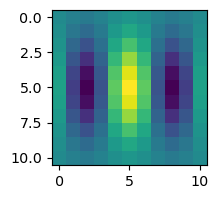

In [115]:
plt.rcParams["figure.figsize"] = (2, 2)
dot_gabor = cv2.getGaborKernel((10,10), sigma=6, theta=0, lambd=2*pi, gamma=2.5, psi=0)
plt.imshow(dot_gabor)
plt.show()

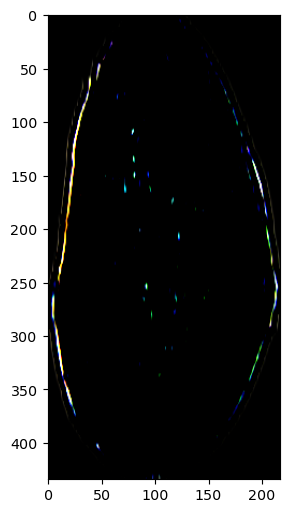

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [116]:
plt.rcParams["figure.figsize"] = (6, 6)
dot_detect = cv2.filter2D(image_rgb, cv2.CV_8UC3, dot_gabor)
# dot_detect = dot_detect + clahe_v
# print(dot_detect)
dot_detect = np.asarray(dot_detect, dtype=np.uint8)
plt.imshow(dot_detect)
plt.show()
print(dot_detect)